In [1]:

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


# Importing Liabraries

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 25.9 MB/s eta 0:00:00


In [3]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns
import yaml
import matplotlib.patches as patches

sns.set_style('darkgrid')

In [4]:
import yaml

# Define the dataset information
dataset_info = {
    'train': '/kaggle/input/sr-det/sat-gen-256x256/train/images',
    'val': '/kaggle/input/sr-det/sat-gen-256x256/val/images',
    'test': '/kaggle/input/sr-det/sat-gen-256x256/test/images',
    'nc': 11,
    'names': ['airplane', 'boat', 'car', 'cargo ship', 'fighter jet', 'helicopter', 'jet', 'military aircraft', 'propeller plane', 'truck', 'yacht']
}

# Create and save the data.yaml file
data_yaml_path = '/kaggle/working/data.yaml'
with open(data_yaml_path, 'w') as yaml_file:
    yaml.dump(dataset_info, yaml_file, default_flow_style=False)

# Data Visualization

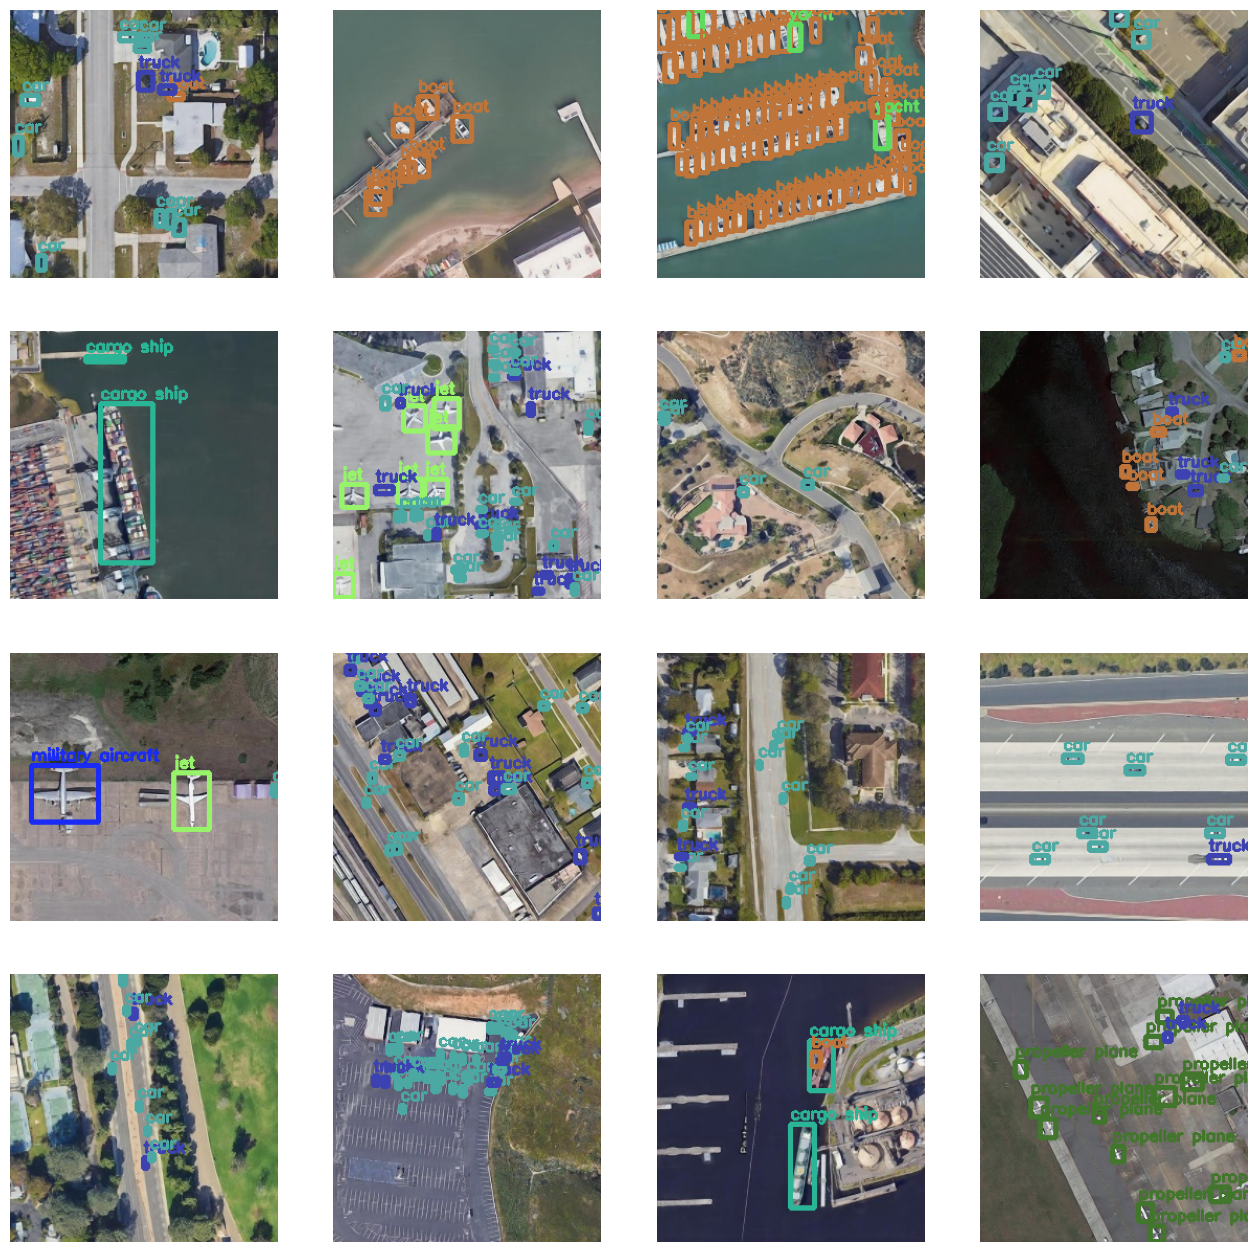

In [5]:
# Define the paths to the images and labels directories
train_images = "/kaggle/input/sr-det/sat-gen-256x256/train/images"
train_labels = "/kaggle/input/sr-det/sat-gen-256x256/train/labels"

test_images = "/kaggle/input/sr-det/sat-gen-256x256/test/images"
test_labels = "/kaggle/input/sr-det/sat-gen-256x256/test/labels"

val_images = "/kaggle/input/sr-det/sat-gen-256x256/val/images"
val_labels = "/kaggle/input/sr-det/sat-gen-256x256/val/labels"

# Load class information from the YAML file
yaml_path = '/kaggle/working/data.yaml'
with open(yaml_path, "r") as f:
    data = yaml.load(f, Loader=yaml.FullLoader)
classes = data["names"]

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))

# Function to generate a random color
def random_color():
    return tuple(random.randint(0, 255) for _ in range(3))

# Assign different colors to each class
class_colors = {class_name: random_color() for class_name in classes}

# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4
    
    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        
        # Use the color assigned to the class
        color = class_colors[classes[int(class_id)]]
        
        # Draw the rectangle with the assigned color
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), color, 3)
        
        # Add class label to the rectangle
        class_name = classes[int(class_id)]
        cv2.putText(image, class_name, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


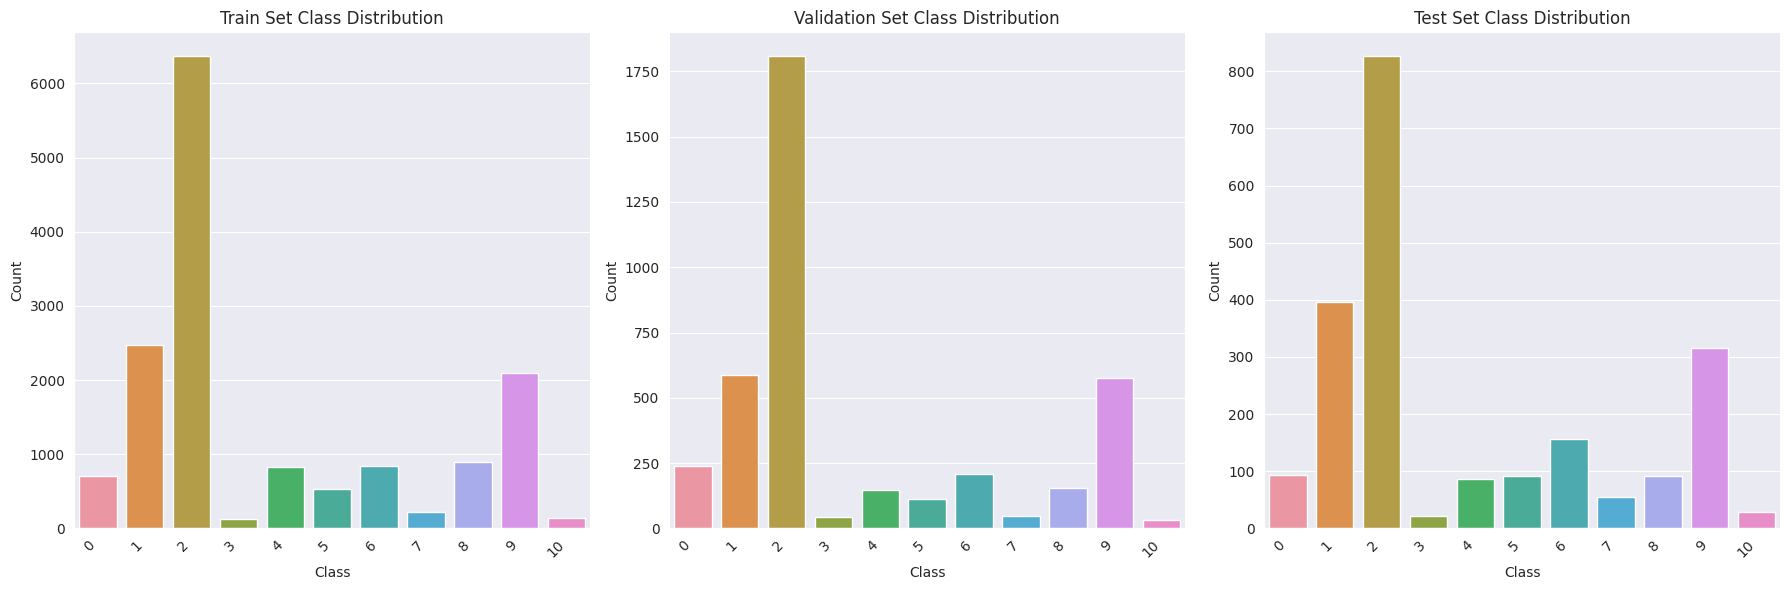

In [6]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

def parse_yolov8_annotations(annotation_path):
    annotations = []
    with open(annotation_path, 'r') as file:
        for line in file:
            line = line.strip().split()
            class_label = int(line[0])
            annotations.append(class_label)
    return annotations

# Replace these paths with your actual paths
train_path = "/kaggle/input/sr-det/sat-gen-256x256/train/labels/"
valid_path = "/kaggle/input/sr-det/sat-gen-256x256/val/labels/"
test_path = "/kaggle/input/sr-det/sat-gen-256x256/test/labels/"

# Load annotations for train, validation, and test sets
train_annotations = []
valid_annotations = []
test_annotations = []

for file_name in os.listdir(train_path):
    train_annotations.extend(parse_yolov8_annotations(os.path.join(train_path, file_name)))

for file_name in os.listdir(valid_path):
    valid_annotations.extend(parse_yolov8_annotations(os.path.join(valid_path, file_name)))

for file_name in os.listdir(test_path):
    test_annotations.extend(parse_yolov8_annotations(os.path.join(test_path, file_name)))

# Convert to Pandas DataFrame
train_df = pd.DataFrame({'class': train_annotations})
valid_df = pd.DataFrame({'class': valid_annotations})
test_df = pd.DataFrame({'class': test_annotations})

# Plot class distribution for train set
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(x='class', data=train_df)
plt.title('Train Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot class distribution for validation set
plt.subplot(1, 3, 2)
sns.countplot(x='class', data=valid_df)
plt.title('Validation Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Plot class distribution for test set
plt.subplot(1, 3, 3)
sns.countplot(x='class', data=test_df)
plt.title('Test Set Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


# Building & Training Model

In [7]:
#disable wandb
import os
os.environ["WANDB_DISABLED"] = "true"

In [8]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

# Training the model
model.train(data = '/kaggle/working/data.yaml',
            epochs =100,
            imgsz = 256,
            seed = 42,
            batch = 8,
            workers = 4,
            project='yolo8',  # Specify your project name
            name='result') 

100%|██████████| 131M/131M [00:00<00:00, 297MB/s]


Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/kaggle/working/data.yaml, epochs=100, time=None, patience=100, batch=8, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=4, project=yolo8, name=result, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 755k/755k [00:00<00:00, 38.3MB/s]
2024-03-20 21:02:11,449	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-20 21:02:12,313	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-20 21:02:14.456401: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-20 21:02:14.456518: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-20 21:02:14.587837: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=11

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytic

wandb: Tracking run with wandb version 0.16.3
wandb: W&B syncing is set to `offline` in this directory.  
wandb: Run `wandb online` or set WANDB_MODE=online to enable cloud syncing.


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...


100%|██████████| 6.23M/6.23M [00:00<00:00, 169MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/input/sr-det/sat-gen-256x256/train/labels... 1470 images, 3 backgrounds, 0 corrupt: 100%|██████████| 1470/1470 [00:02<00:00, 534.61it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/sr-det/sat-gen-256x256/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/sr-det/sat-gen-256x256/val/labels... 420 images, 0 backgrounds, 0 corrupt: 100%|██████████| 420/420 [00:00<00:00, 475.42it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/sr-det/sat-gen-256x256/val is not writeable, cache not saved.


Plotting labels to yolo8/result/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000667, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 256 train, 256 val
Using 4 dataloader workers
Logging results to yolo8/result
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.63G      1.697      2.184      1.054         78        256: 100%|██████████| 184/184 [00:38<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:05<00:00,  4.97it/s]


                   all        420       3958      0.373      0.484      0.382      0.233

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.89G      1.707      1.664      1.024         91        256: 100%|██████████| 184/184 [00:34<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  5.77it/s]

                   all        420       3958      0.197      0.183     0.0813     0.0426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.94G       1.73        1.6      1.047        104        256: 100%|██████████| 184/184 [00:33<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.48it/s]

                   all        420       3958      0.502      0.403      0.389       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.94G       1.73       1.56      1.038         43        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.43it/s]

                   all        420       3958      0.542       0.54      0.505      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.93G      1.703      1.469      1.026        102        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.48it/s]

                   all        420       3958      0.338      0.611      0.316       0.18



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100       3.9G      1.697      1.445      1.014         79        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.29it/s]

                   all        420       3958      0.523      0.585      0.576      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100       3.9G      1.635      1.389      1.021         60        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       3958      0.552      0.602        0.6      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.93G      1.583      1.338     0.9915         23        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.49it/s]

                   all        420       3958      0.573      0.639      0.622      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100       3.9G      1.619      1.314      1.004         81        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.46it/s]

                   all        420       3958      0.646      0.589       0.63      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.94G      1.548      1.283     0.9859         73        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       3958      0.674      0.568      0.633      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.93G      1.542       1.23     0.9818        101        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.49it/s]

                   all        420       3958      0.603      0.656      0.654      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.93G      1.512      1.216     0.9728         83        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.38it/s]

                   all        420       3958      0.652      0.625      0.672      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.93G      1.485      1.171     0.9643         53        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.47it/s]

                   all        420       3958      0.612      0.659      0.652      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.93G      1.448      1.149     0.9618         78        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.49it/s]

                   all        420       3958      0.642      0.683       0.68      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.93G      1.458      1.135     0.9566         48        256: 100%|██████████| 184/184 [00:33<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.47it/s]

                   all        420       3958      0.723      0.651      0.706      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100       3.9G      1.418      1.103     0.9474         95        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.50it/s]

                   all        420       3958      0.791      0.641      0.722      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       3.9G      1.404      1.063     0.9433        127        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       3958      0.751      0.633      0.707      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.92G       1.41      1.041     0.9411         94        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]

                   all        420       3958      0.715      0.687      0.726      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100       3.9G      1.421      1.041     0.9388         82        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.52it/s]

                   all        420       3958      0.755      0.643      0.723      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.93G       1.38      1.028      0.944         94        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.47it/s]

                   all        420       3958      0.735      0.691      0.741      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.93G      1.377     0.9983     0.9347         58        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958      0.732      0.674       0.73      0.489



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.93G      1.381      1.007     0.9304         94        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]

                   all        420       3958      0.747      0.681      0.751       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.94G      1.346     0.9862     0.9287         77        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.42it/s]

                   all        420       3958      0.773      0.712      0.765      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.93G      1.361      0.977     0.9201        110        256: 100%|██████████| 184/184 [00:33<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.44it/s]

                   all        420       3958       0.76      0.684      0.752      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.93G      1.344     0.9567     0.9305        107        256: 100%|██████████| 184/184 [00:33<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.33it/s]

                   all        420       3958      0.759      0.661      0.741      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.93G      1.322     0.9673     0.9236         68        256: 100%|██████████| 184/184 [00:33<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.51it/s]

                   all        420       3958       0.74       0.72      0.758       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.93G        1.3     0.9215     0.9196        217        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.54it/s]

                   all        420       3958        0.8      0.701      0.759      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.93G      1.297     0.9217     0.9146        112        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958      0.765      0.728      0.764      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.93G      1.301     0.9024      0.911        122        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.53it/s]

                   all        420       3958      0.765      0.723      0.762      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100       3.9G      1.317     0.9291     0.9141         60        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.53it/s]

                   all        420       3958      0.797       0.72      0.774      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.93G       1.27     0.8936      0.921         95        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.52it/s]

                   all        420       3958      0.778      0.686      0.752      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.93G        1.3      0.904     0.9169         79        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       3958      0.782      0.721      0.774      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.93G      1.244     0.8842     0.9098         32        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.51it/s]

                   all        420       3958      0.764       0.71      0.772      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.93G      1.282     0.8832     0.9018         94        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.54it/s]

                   all        420       3958      0.762      0.708      0.752       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.93G      1.251     0.8679     0.9027         52        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]

                   all        420       3958      0.758      0.703      0.762       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100       3.9G      1.249     0.8545     0.9043         68        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958       0.75      0.752      0.783       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.93G      1.249     0.8548     0.9063         78        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958      0.788      0.731      0.781      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.93G      1.249     0.8714     0.9088         57        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.43it/s]

                   all        420       3958      0.732      0.737      0.765      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.94G      1.222     0.8296     0.9024         84        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958      0.794      0.737      0.787      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.93G      1.229      0.823     0.9039         75        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]

                   all        420       3958      0.783      0.741      0.792       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.91G      1.232     0.8237     0.8981         82        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.34it/s]

                   all        420       3958      0.767      0.753       0.79      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.93G      1.213     0.8155     0.9018        104        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.48it/s]

                   all        420       3958      0.783      0.765      0.795      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.92G      1.203     0.7923     0.9049        129        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958      0.768      0.749       0.77      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       3.9G      1.214     0.8075     0.8992        135        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.53it/s]

                   all        420       3958      0.776       0.75      0.786       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.93G      1.199     0.7924      0.893         52        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.38it/s]

                   all        420       3958      0.764      0.751       0.79       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.93G      1.194     0.7833     0.8952         36        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]

                   all        420       3958      0.763      0.767      0.792      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.92G       1.19     0.7866     0.8936         61        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]

                   all        420       3958      0.765      0.756      0.781      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       3.9G      1.164     0.7501     0.8892         28        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.49it/s]

                   all        420       3958      0.765      0.747      0.775      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       3.9G      1.166     0.7658     0.8874         39        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.26it/s]

                   all        420       3958      0.751      0.773        0.8      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       3.9G      1.166     0.7523     0.8884         52        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       3958      0.728      0.785      0.792      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.92G       1.15     0.7491     0.8942         99        256: 100%|██████████| 184/184 [00:33<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.49it/s]

                   all        420       3958      0.811      0.745      0.803      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.93G       1.15     0.7474     0.8803         89        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.54it/s]

                   all        420       3958      0.803      0.753      0.801      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       3.9G      1.141     0.7305     0.8917         97        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]

                   all        420       3958      0.791      0.775      0.803      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.93G      1.148     0.7492     0.8874        132        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.53it/s]

                   all        420       3958      0.799      0.737      0.801      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.93G      1.149     0.7553     0.8862         83        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.53it/s]

                   all        420       3958      0.786      0.756      0.815      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100       3.9G      1.141     0.7306      0.888         73        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.50it/s]

                   all        420       3958      0.774      0.759      0.801      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.93G      1.127     0.7328     0.8851         65        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.51it/s]

                   all        420       3958      0.812      0.741      0.801      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.93G      1.133      0.729     0.8819        177        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.51it/s]

                   all        420       3958      0.797      0.758      0.816      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100       3.9G      1.112     0.7131     0.8887        125        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]

                   all        420       3958      0.748      0.767      0.804      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100       3.9G      1.104     0.7042     0.8795         54        256: 100%|██████████| 184/184 [00:33<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.54it/s]

                   all        420       3958      0.813      0.751      0.814      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.91G      1.102     0.7038     0.8783         54        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958      0.805      0.754      0.809      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       3.9G      1.111      0.706     0.8806         77        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]

                   all        420       3958      0.836       0.75      0.809       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.93G      1.113     0.7076     0.8784        118        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]

                   all        420       3958      0.796      0.778      0.819       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.93G      1.106       0.71     0.8765         37        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       3958      0.785      0.791      0.817      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.9G      1.081     0.6768     0.8692         62        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]

                   all        420       3958      0.782      0.787      0.822      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       3.9G      1.084      0.679     0.8768         97        256: 100%|██████████| 184/184 [00:33<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.60it/s]

                   all        420       3958       0.83      0.765      0.816      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       3.9G      1.092     0.6738     0.8782         45        256: 100%|██████████| 184/184 [00:33<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.53it/s]

                   all        420       3958      0.779      0.793      0.818        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.93G      1.069     0.6685      0.872         48        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.40it/s]

                   all        420       3958        0.8      0.785      0.817      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.94G      1.062     0.6661      0.871         79        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]

                   all        420       3958      0.798      0.767       0.82      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.92G      1.075     0.6664     0.8736        107        256: 100%|██████████| 184/184 [00:33<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.54it/s]

                   all        420       3958      0.822      0.763      0.819      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100       3.9G      1.049     0.6302     0.8689         98        256: 100%|██████████| 184/184 [00:33<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]

                   all        420       3958      0.819      0.777       0.83      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100       3.9G      1.062     0.6526     0.8724        118        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.49it/s]

                   all        420       3958      0.799      0.783      0.824      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       3.9G      1.034     0.6446     0.8694         79        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958      0.796      0.797      0.826      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       3.9G      1.077     0.6535     0.8696        103        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]

                   all        420       3958      0.814      0.794      0.822      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.93G      1.064     0.6455     0.8719         43        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]

                   all        420       3958      0.797      0.785      0.827      0.599



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.93G      1.054     0.6435     0.8704         85        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.59it/s]

                   all        420       3958      0.799       0.79      0.829      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100       3.9G      1.041     0.6287     0.8665        145        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.52it/s]

                   all        420       3958      0.797      0.797      0.819      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.92G      1.024      0.624     0.8663         83        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]

                   all        420       3958      0.802      0.789      0.826      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100       3.9G      1.028      0.625     0.8655         96        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.60it/s]

                   all        420       3958      0.786      0.801      0.824       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.92G      1.023     0.6174     0.8664         75        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958      0.821      0.778      0.821      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.93G      1.018     0.6126     0.8634         31        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.51it/s]

                   all        420       3958      0.802      0.784      0.826      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.94G       1.02     0.6162     0.8659         63        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.54it/s]

                   all        420       3958      0.809      0.787      0.823      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.93G      1.003     0.6026     0.8609        112        256: 100%|██████████| 184/184 [00:33<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.56it/s]

                   all        420       3958      0.808      0.789      0.817      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100       3.9G      1.024     0.6121      0.863        130        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]

                   all        420       3958      0.832      0.789      0.831      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.93G     0.9894     0.5878     0.8615         53        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.54it/s]

                   all        420       3958      0.843      0.769       0.83      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.93G      1.004     0.5993     0.8611         55        256: 100%|██████████| 184/184 [00:33<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.52it/s]

                   all        420       3958      0.812      0.789      0.828      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100       3.9G      1.002     0.5926     0.8588         96        256: 100%|██████████| 184/184 [00:33<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.52it/s]

                   all        420       3958      0.814      0.798      0.821      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.94G      1.003     0.5845     0.8556        138        256: 100%|██████████| 184/184 [00:33<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.55it/s]

                   all        420       3958      0.829      0.782      0.825      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.93G     0.9915     0.5869     0.8599        146        256: 100%|██████████| 184/184 [00:33<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]

                   all        420       3958      0.809      0.794      0.823      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.93G      0.987      0.577     0.8586        102        256: 100%|██████████| 184/184 [00:33<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.47it/s]

                   all        420       3958      0.839      0.774      0.831      0.618


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       3.9G     0.9426     0.5418     0.8452         51        256: 100%|██████████| 184/184 [00:34<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.50it/s]

                   all        420       3958      0.805      0.802      0.831      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.93G     0.9396     0.5341     0.8472         33        256: 100%|██████████| 184/184 [00:33<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.53it/s]

                   all        420       3958       0.81      0.789      0.818      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.93G     0.9368     0.5365     0.8459         52        256: 100%|██████████| 184/184 [00:33<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.45it/s]

                   all        420       3958      0.796      0.794      0.824      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.93G     0.9257      0.529     0.8429         44        256: 100%|██████████| 184/184 [00:33<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.39it/s]

                   all        420       3958      0.824      0.791      0.828      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       3.9G     0.9369     0.5294     0.8467         45        256: 100%|██████████| 184/184 [00:33<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.58it/s]

                   all        420       3958      0.827      0.783      0.832      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.93G     0.9245     0.5184     0.8491         44        256: 100%|██████████| 184/184 [00:33<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.53it/s]

                   all        420       3958      0.858      0.763      0.834      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.93G     0.9253     0.5252     0.8453         81        256: 100%|██████████| 184/184 [00:33<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.51it/s]

                   all        420       3958       0.82      0.795      0.838      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.93G      0.929      0.523     0.8446         40        256: 100%|██████████| 184/184 [00:33<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.57it/s]

                   all        420       3958       0.82      0.791      0.835       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.93G     0.9309     0.5197     0.8402         34        256: 100%|██████████| 184/184 [00:33<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.51it/s]

                   all        420       3958      0.812      0.802      0.835      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.93G     0.9156     0.5094     0.8421        112        256: 100%|██████████| 184/184 [00:33<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:04<00:00,  6.54it/s]

                   all        420       3958      0.814      0.807      0.836      0.623



100 epochs completed in 1.152 hours.
Optimizer stripped from yolo8/result/weights/last.pt, 136.7MB
Optimizer stripped from yolo8/result/weights/best.pt, 136.7MB

Validating yolo8/result/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 268 layers, 68134161 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 27/27 [00:10<00:00,  2.54it/s]


                   all        420       3958       0.82      0.796      0.838      0.625
              airplane        420        240      0.923      0.943      0.972      0.773
                  boat        420        587      0.927      0.775      0.886      0.617
                   car        420       1809      0.819       0.44      0.624      0.345
            cargo ship        420         44      0.818      0.886      0.888      0.729
           fighter jet        420        145      0.938      0.979      0.983      0.763
            helicopter        420        114       0.93      0.927      0.962      0.657
                   jet        420        207      0.862      0.874      0.903      0.688
     military aircraft        420         48      0.908      0.938      0.929      0.761
       propeller plane        420        154      0.727      0.838      0.856      0.625
                 truck        420        577      0.613      0.307      0.423      0.256
                 yach

wandb:                                                                                
wandb: 
wandb: Run history:
wandb:                  lr/pg0 ▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg1 ▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:                  lr/pg2 ▃████▇▇▇▇▇▆▆▆▆▆▅▅▅▅▅▅▄▄▄▄▄▃▃▃▃▃▃▂▂▂▂▂▁▁▁
wandb:        metrics/mAP50(B) ▁▁▄▅▅▅▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇▇▇▇████████████████
wandb:     metrics/mAP50-95(B) ▁▁▃▄▄▄▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇▇██████████████
wandb:    metrics/precision(B) ▁▃▃▄▅▅▇▆▆▇▇▇▇▇▇▇▇▇▇▇█▇▇▇█▇▇▇▇█▇▇████████
wandb:       metrics/recall(B) ▂▁▄▅▅▆▅▆▆▆▇▇▆▆▇▇▇▇▇█▇▇▇▇▇██▇████████████
wandb:            model/GFLOPs ▁
wandb:        model/parameters ▁
wandb: model/speed_PyTorch(ms) ▁
wandb:          train/box_loss ███▇▆▆▅▅▅▅▄▄▄▄▄▄▄▄▃▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:          train/cls_loss █▆▅▄▄▄▃▃▃▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁
wandb:          train/dfl_loss ██▇▆▆▅▄▄▄▄▄▃▄▃▃▃▃▃▃▂▃▂▃▃▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁
wandb:            val/box_loss ▆█▆▆▅▅▄▄▄▃▃▃▃▃▂▂▂▂▂▂▂▂▂▂▂▂▂▁▁▁▁▁▁▁▁

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c0b33173c70>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.

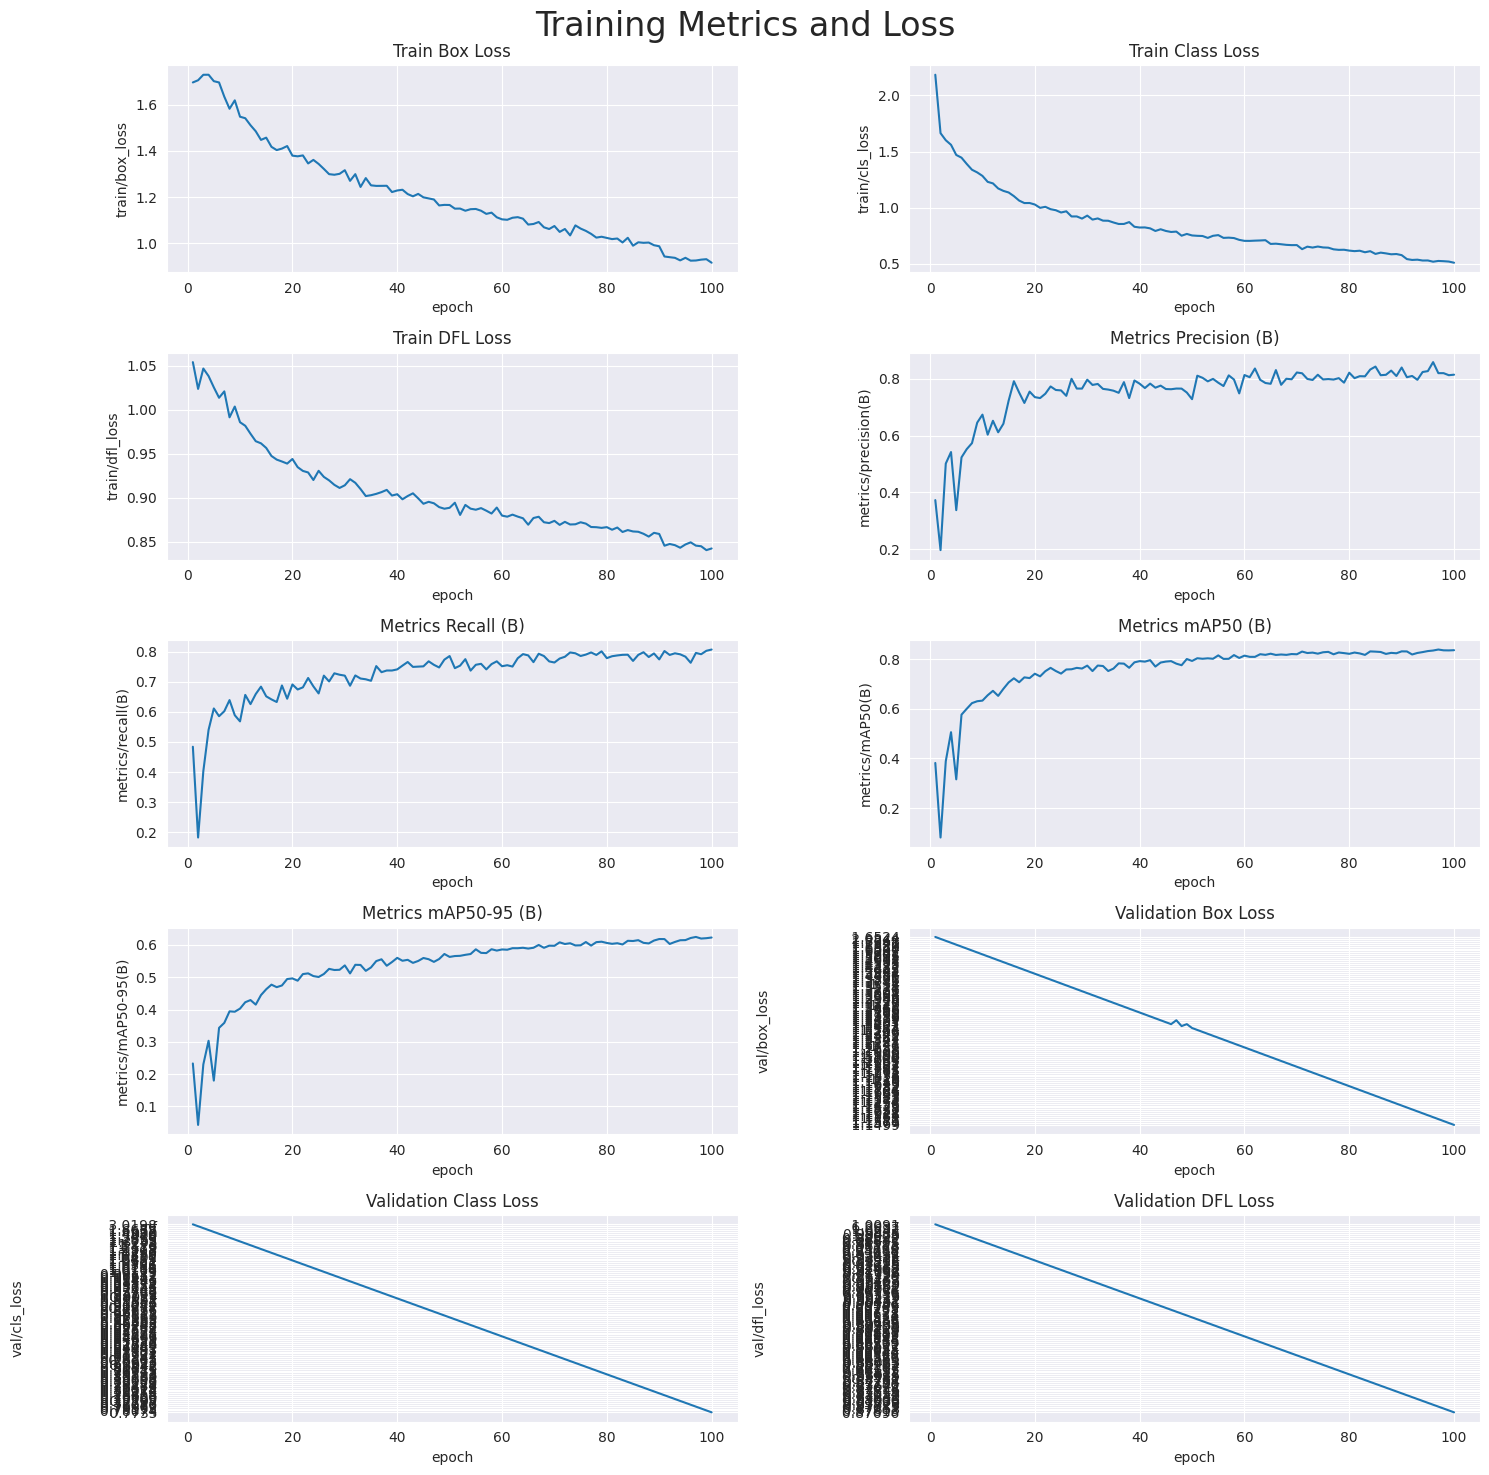

In [9]:
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('/kaggle/working/yolo8/result/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# Results

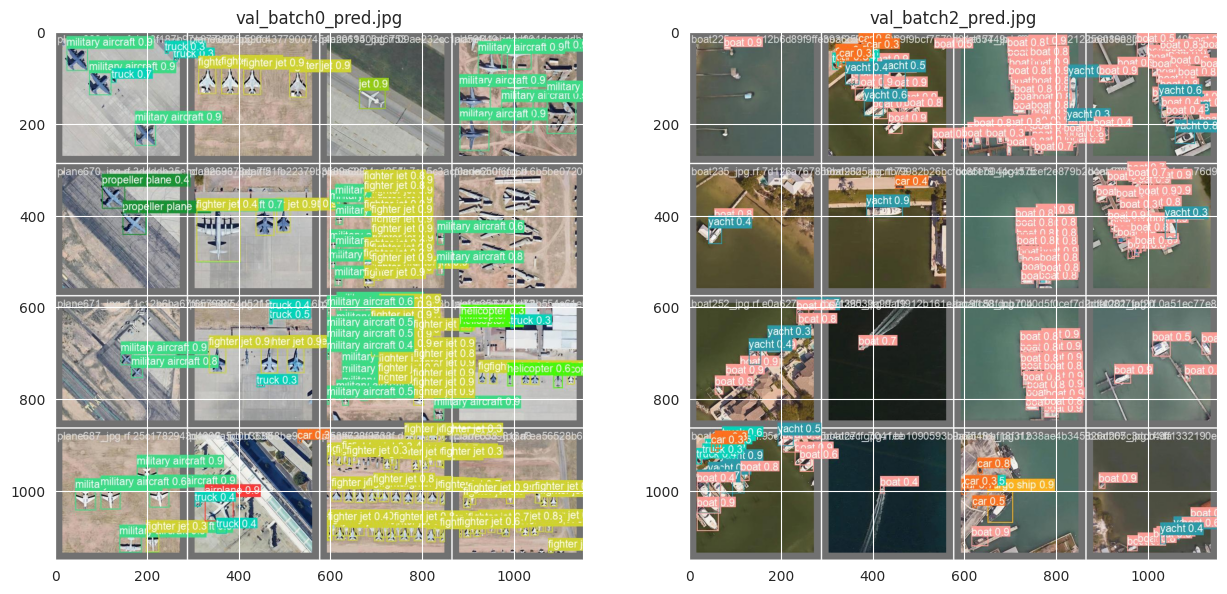

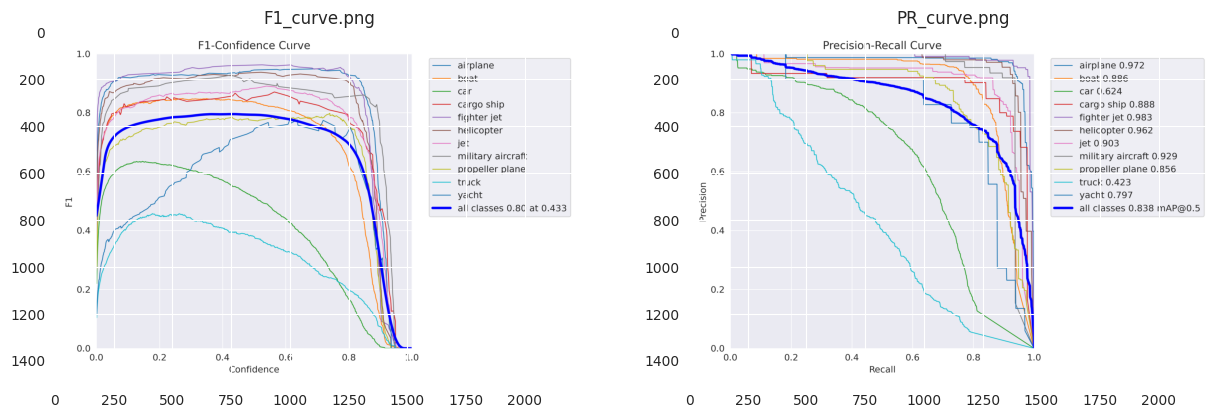

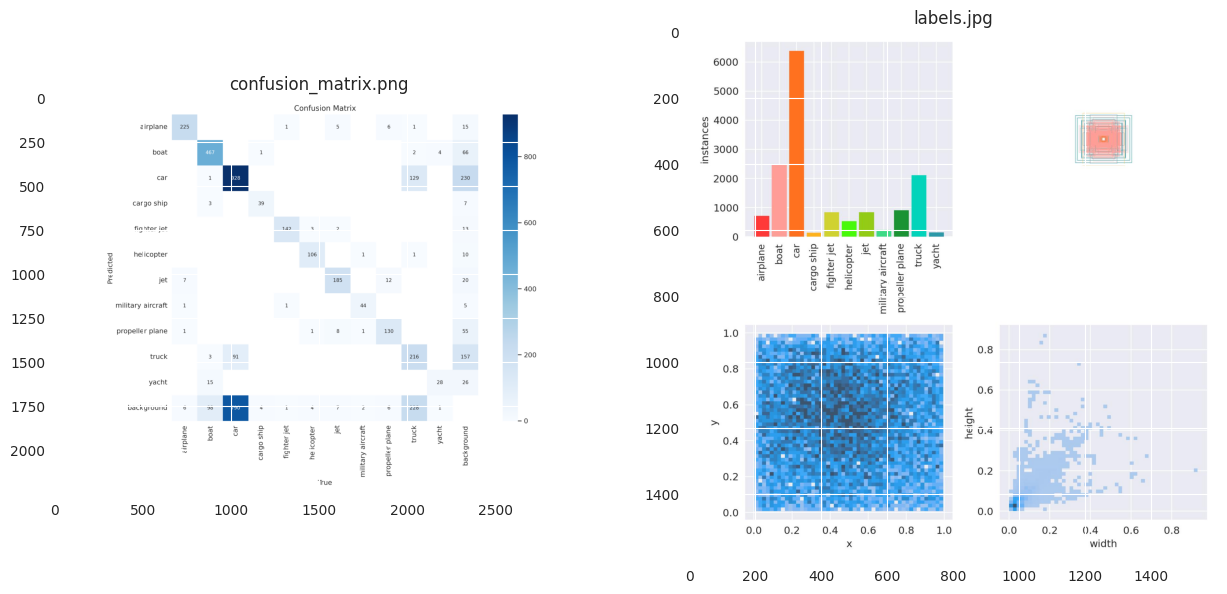

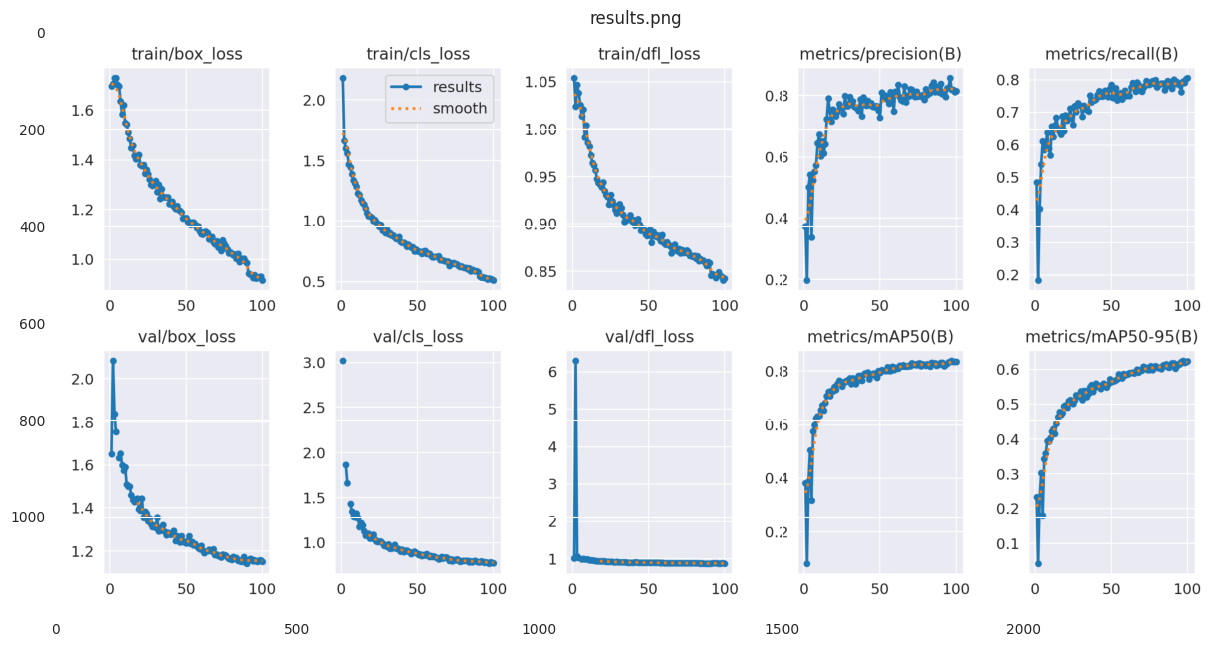

In [10]:
model_path = '/kaggle/working/yolo8/result/'

def plot(ls, size):
    c = 1
    plt.figure(figsize=(15, 10))
    for im in ls:
        plt.subplot(size[0], size[1], c)
        img = plt.imread(model_path + im)
        plt.imshow(img)
        plt.title(im)
        c += 1
    plt.show()

# Visualize images and plots
plot(['val_batch0_pred.jpg', 'val_batch2_pred.jpg'], (1, 2))
plot(['F1_curve.png', 'PR_curve.png'], (1, 2))
plot(['confusion_matrix.png', 'labels.jpg'], (1, 2))
plot(['results.png'], (1, 1))


# Prediction

In [11]:
# Function to perform ship detections
def ship_detect(img_path):
    
    # Read the image
    img = cv2.imread(img_path)

    # Pass the image through the detection model and get the result
    detect_result = model(img)

    # Plot the detections
    detect_img = detect_result[0].plot()
    
    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)
    
    return detect_img


0: 256x256 14 boats, 15.4ms
Speed: 0.8ms preprocess, 15.4ms inference, 2.0ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 boat, 15.8ms
Speed: 0.9ms preprocess, 15.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 8 jets, 1 propeller plane, 15.6ms
Speed: 1.1ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 3 boats, 1 yacht, 15.6ms
Speed: 0.9ms preprocess, 15.6ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 5 boats, 9 yachts, 15.3ms
Speed: 0.9ms preprocess, 15.3ms inference, 1.4ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 1 boat, 15.5ms
Speed: 1.0ms preprocess, 15.5ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 3 airplanes, 1 car, 15.2ms
Speed: 0.8ms preprocess, 15.2ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 256)

0: 256x256 3 cars, 1 helicopter, 4 trucks, 14.9ms
Speed: 1.0ms preprocess, 14

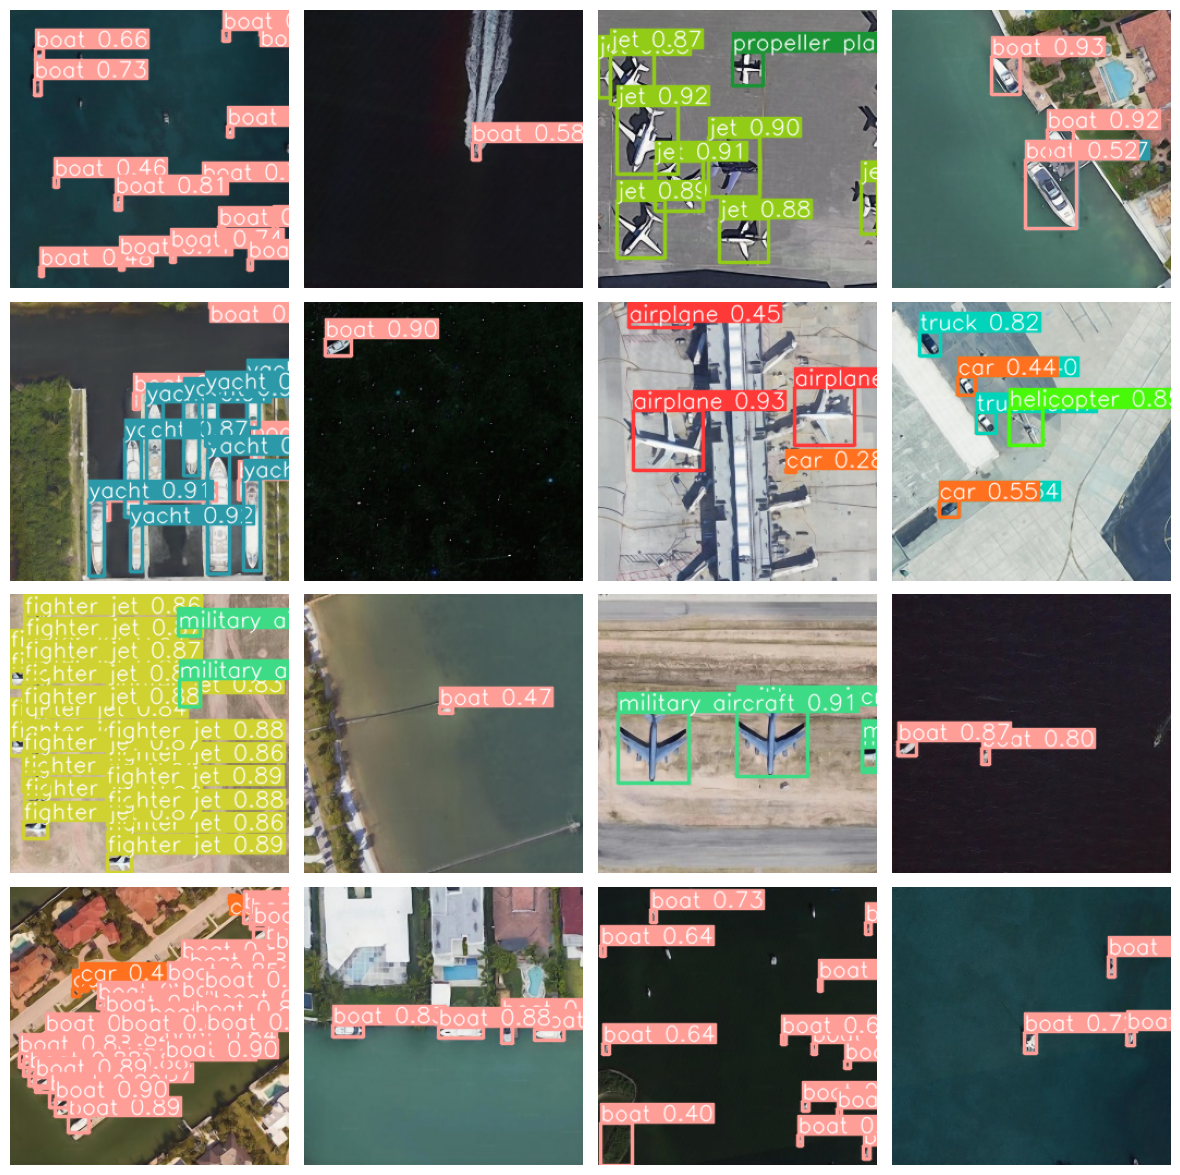

In [12]:
import random

# Define the directory where the custom images are stored
custom_image_dir = '/kaggle/input/sr-det/sat-gen-256x256/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):
    
    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
    
    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)
    
    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)